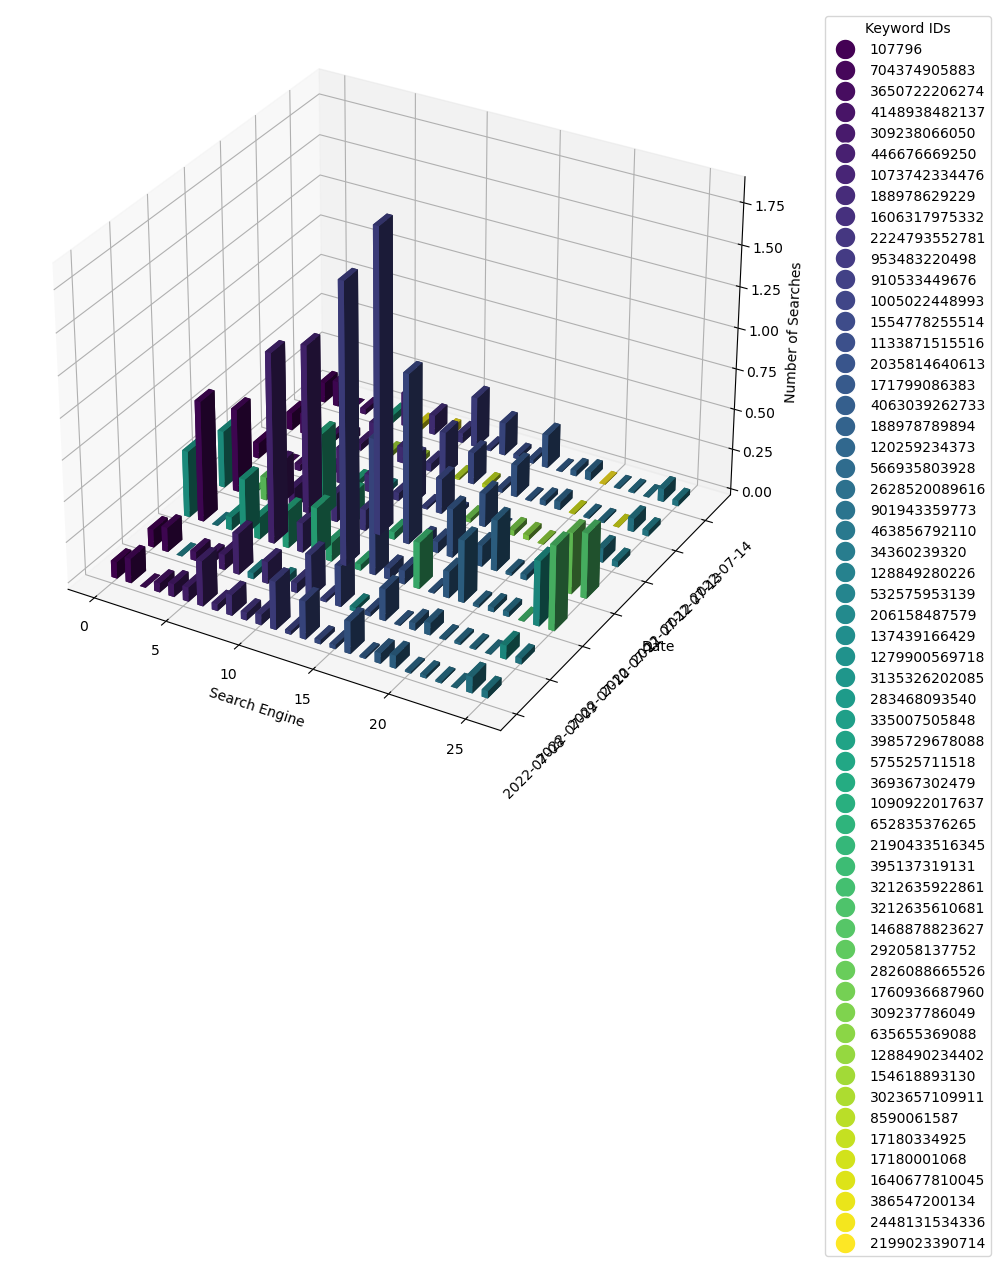

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.dates as mdates
from matplotlib.lines import Line2D

# Load the data
data=pd.read_csv("case_study_junior_ds.csv")


# Ensure 'date' is a datetime object
data['date'] = pd.to_datetime(data['date'])

# Group by 'date' and 'search engine' and get the keyword with the maximum 'searches'
top_keywords_daily = data.loc[data.groupby(['date', 'search_engine'])['searches'].idxmax()]

# Now we can plot each top keyword for each search engine and each date.
# Create a color map based on the unique keyword IDs
unique_keywords = top_keywords_daily['keyword_id'].astype(str).unique()
color_map = plt.get_cmap('viridis', len(unique_keywords))
colors = color_map(np.linspace(0, 1, len(unique_keywords)))
keyword_to_color = dict(zip(unique_keywords, colors))

# Plotting
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')

# Plotting the bars
for date in data['date'].unique():
    for engine in data['search_engine'].unique():
        # Select the data for this date and this engine
        subset = top_keywords_daily[(top_keywords_daily['date'] == date) & (top_keywords_daily['search_engine'] == engine)]
        if not subset.empty:
            keyword = subset.iloc[0]['keyword_id']
            searches = subset.iloc[0]['searches']
            color = keyword_to_color[str(keyword)]
            ax.bar3d(engine, mdates.date2num(date), 0, 0.4, 0.4, searches, color=color, zsort='max')

# Create a custom legend for keyword IDs
legend_elements = [Line2D([0], [0], marker='o', color='w', label=str(keyword),
                          markerfacecolor=color_map(i), markersize=15)
                   for i, keyword in enumerate(unique_keywords)]
ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1.05, 1), title="Keyword IDs")

# Set axis labels and date formatting
ax.set_xlabel('Search Engine')
ax.set_ylabel('Date')
ax.set_zlabel('Number of Searches')

ax.yaxis.set_major_locator(mdates.DayLocator())
ax.yaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Rotate labels for readability
for label in ax.yaxis.get_majorticklabels():
    label.set_rotation(45)

plt.show()


